In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")    

#1. 히스토그램 계산

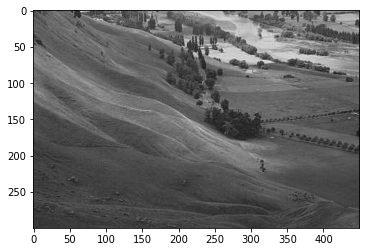

In [ ]:
src = cv2.imread('hawkes.bmp', 0)
imshow("", src)

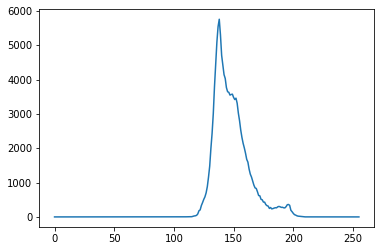

In [ ]:
np.set_printoptions(precision=7, suppress=True)

histSize = [256]
histRange = [0, 256]

hist = cv2.calcHist([src], [0], None, histSize, histRange)
#print(hist)
plt.plot(hist)

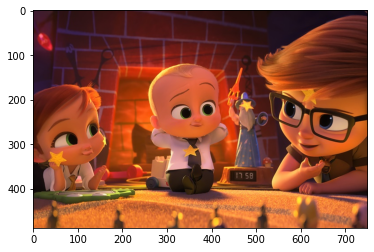

In [ ]:
src = cv2.imread('test.jpg')
imshow("", src)

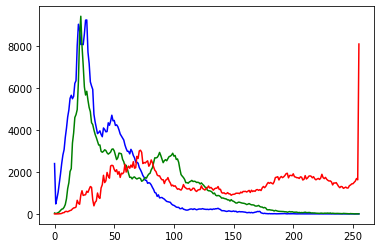

In [ ]:
histB = cv2.calcHist([src], [0], None, histSize, histRange)
histG = cv2.calcHist([src], [1], None, histSize, histRange)
histR = cv2.calcHist([src], [2], None, histSize, histRange)

plt.plot(histB, 'b')
plt.plot(histG, 'g')
plt.plot(histR, 'r')

# 히스토그램스트레칭
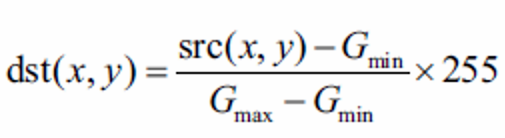

In [ ]:
src = cv2.imread('hawkes.bmp', cv2.IMREAD_GRAYSCALE)

gmin = float(np.min(src))
gmax = float(np.max(src))

dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8)

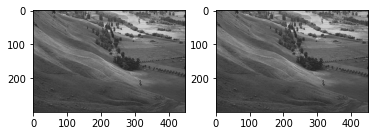

In [ ]:
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

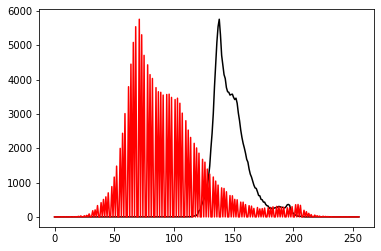

In [ ]:
histSrc = cv2.calcHist([src], [0], None, histSize, histRange)
histDst = cv2.calcHist([dst], [0], None, histSize, histRange)
plt.plot(histSrc, 'k')
plt.plot(histDst, 'r')

$dst(x,y) = \frac{src(x,y)-G_{min}}{G_{max}-G_{min}}\times 255$

# 히스토그램 평활화

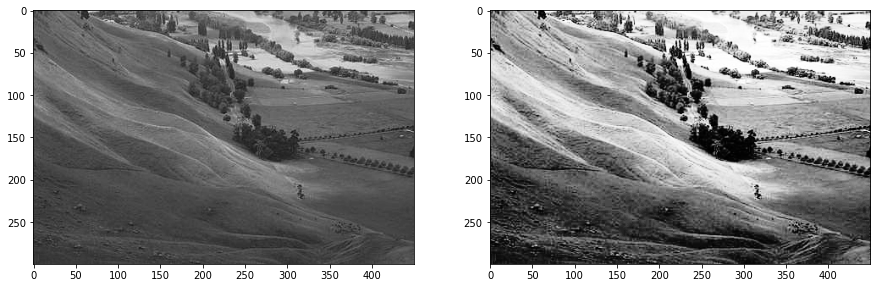

In [ ]:
src = cv2.imread('hawkes.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)


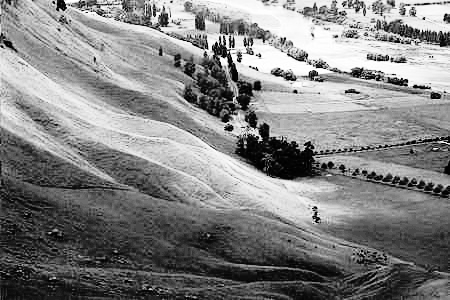

In [ ]:
cv2_imshow(dst)

In [ ]:
cv2.imshow('원본', src)
cv2.imshow('변환', dst)
cv2.waitKey()
cv2.destroyAllWindows()

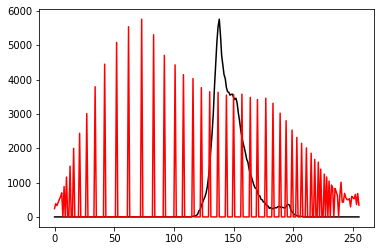

In [ ]:
histSrc = cv2.calcHist([src], [0], None, histSize, histRange)
histDst = cv2.calcHist([dst], [0], None, histSize, histRange)
plt.plot(histSrc, 'k')
plt.plot(histDst, 'r')

In [ ]:
a = np.array([1,5,4,3])

b = np.cumsum(a)
print(b)

[ 1  6 10 13]


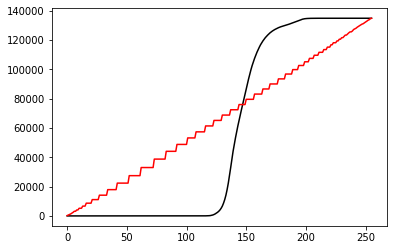

In [ ]:
histSrc_c = np.cumsum(histSrc)
histDst_c = np.cumsum(histDst)
plt.plot(histSrc_c, 'k')
plt.plot(histDst_c, 'r')

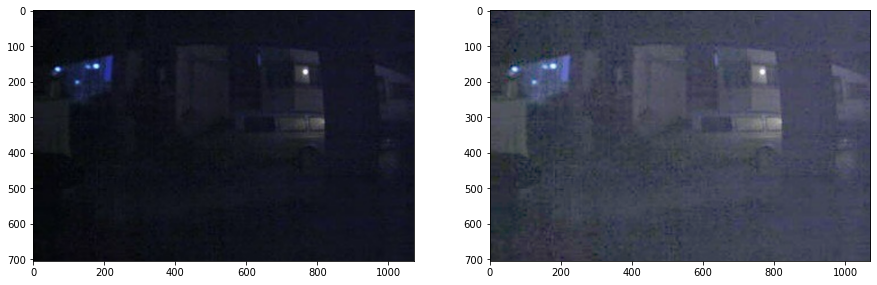

In [ ]:
src = cv2.imread("cctv.PNG") 
gamma = 0.5
lut = np.zeros((256,1),dtype = 'uint8')
for i in range(256):  lut[i][0] = 255 * (float(i)/255) ** (gamma)
dst = cv2.LUT(src, lut)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)@

# 필터

### 엠보싱 필터

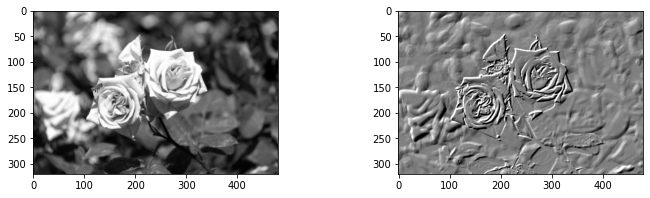

In [ ]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

emboss = np.array([[-1, -1, 0],
                   [-1, 0, 1],
                   [0, 1, 1]], np.float32)

dst = cv2.filter2D(src, -1, emboss, delta=128)
                                                   
plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

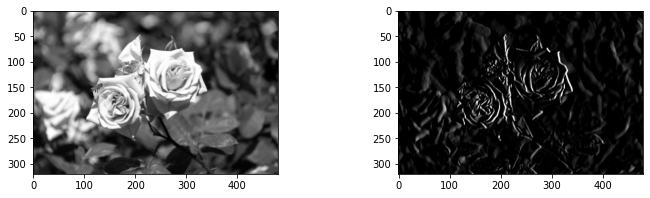

In [ ]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

edge = np.array([   [1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], np.float32)

dst = cv2.filter2D(src, -1, edge, delta=0)

plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

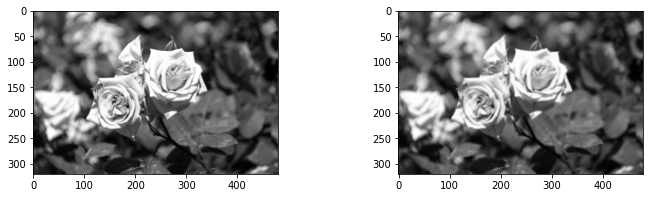

In [ ]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

avg = np.array([   [1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], np.float32) / 9              



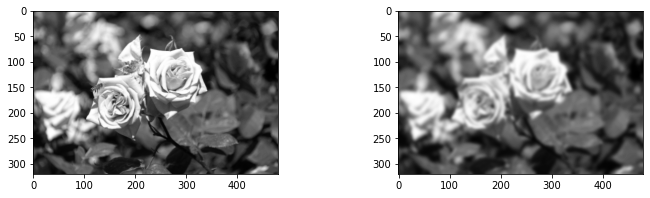

In [ ]:
dst = cv2.filter2D(dst, -1, avg, delta=0)
plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

### 블러필터

In [ ]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

for ksize in (3,5,7,11,13,15) :
  dst = cv2.blur(src, (ksize, ksize))
  desc = "Mean: %dx%d" % (ksize, ksize)
  cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)
  imshow('dst', dst)
  plt.show()

### 가우시안 필터

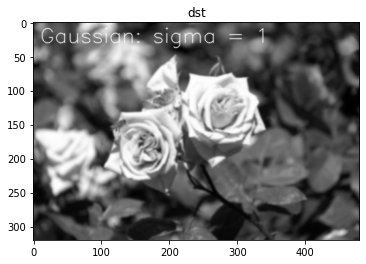

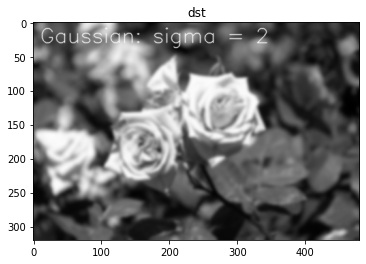

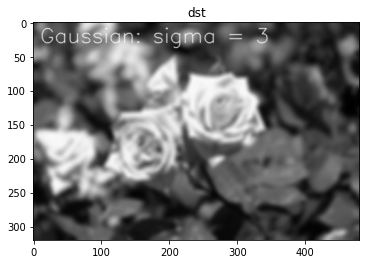

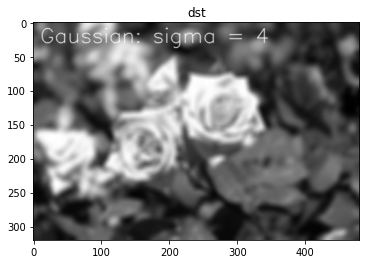

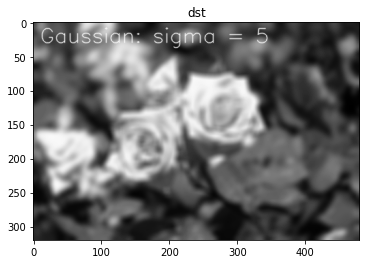

In [ ]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

imshow('src', src)

for sigma in range(1, 6):
        dst = cv2.GaussianBlur(src, (11, 11), sigma)

        desc = "Gaussian: sigma = %d" % (sigma)
        cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)

        imshow('dst', dst)
        plt.show()

### unsharp
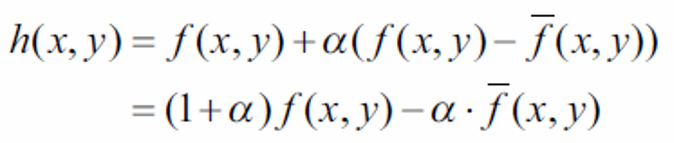

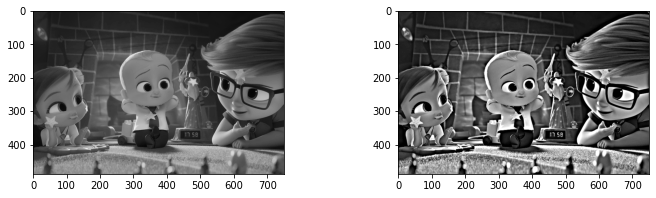

In [ ]:
src = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
sigma = 7
alpha = 2.0
blurred = cv2.GaussianBlur(src, (0, 0), sigma)
dst = cv2.addWeighted(src, 1 + alpha, blurred, -alpha, 0.0)

plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

### 양뱡향필터

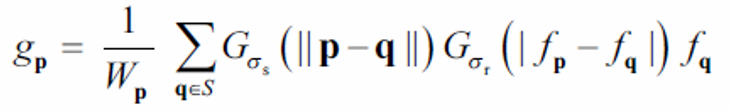

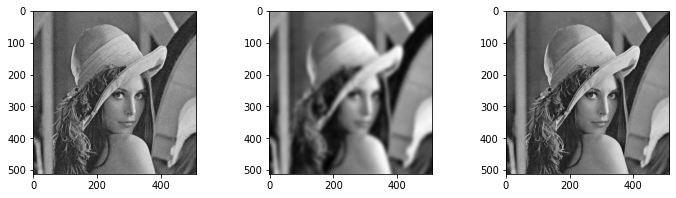

In [ ]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

noise = np.zeros(src.shape, np.int32)
cv2.randn(noise, 0, 10)
cv2.add(src, noise, src, dtype=cv2.CV_8UC1)  

dst1 = cv2.GaussianBlur(src, (0, 0), 5)
dst2 = cv2.bilateralFilter(src, -1, 10, 5)

plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
imshow("", src)
plt.subplot(1,3,2)
imshow("", dst1)
plt.subplot(1,3,3)
imshow("", dst2)

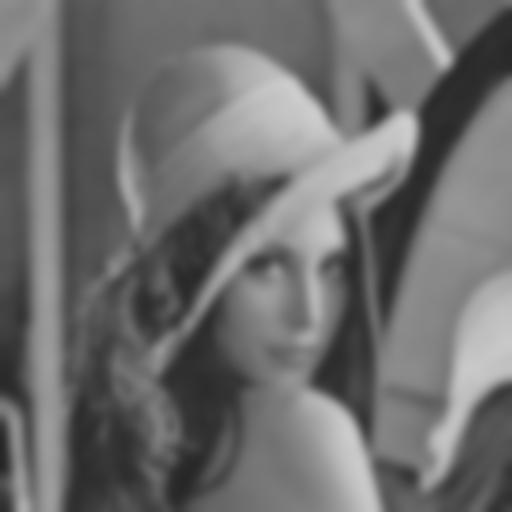

In [ ]:
cv2_imshow(dst1)

### median 필터

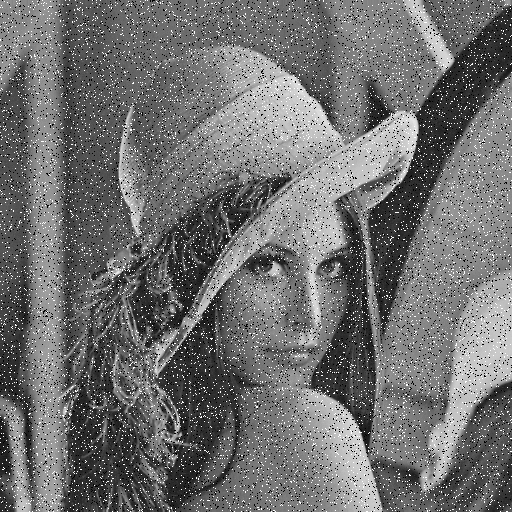

In [ ]:
import random

src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

for i in range(0, int(src.size / 10)):
        x = random.randint(0, src.shape[1] - 1)
        y = random.randint(0, src.shape[0] - 1)
        src[x, y] = (i % 2) * 255
cv2_imshow(src)

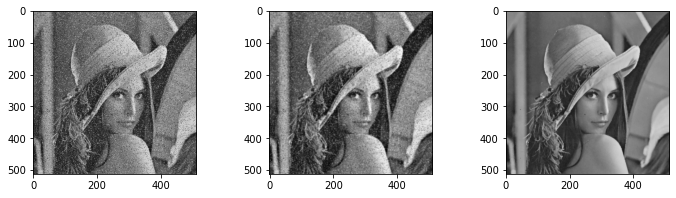

In [ ]:
dst1 = cv2.GaussianBlur(src, (0, 0), 1)
dst2 = cv2.medianBlur(src, 3)

plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
imshow("", src)
plt.subplot(1,3,2)
imshow("", dst1)
plt.subplot(1,3,3)
imshow("", dst2)

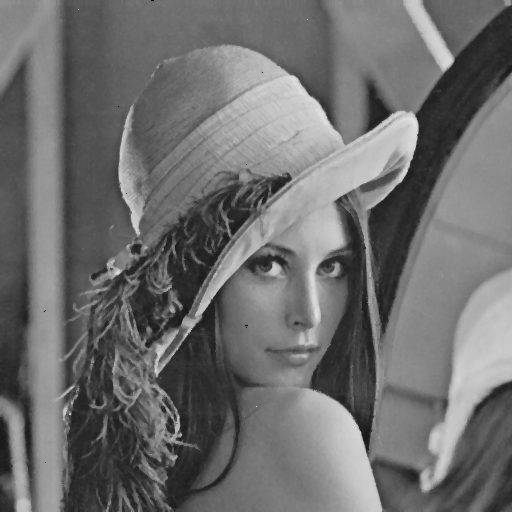

In [ ]:
cv2_imshow(dst2)

### 응용 1

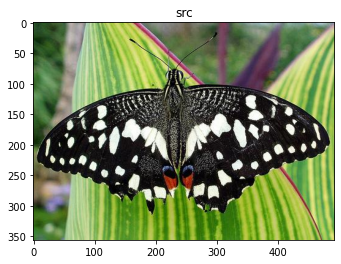

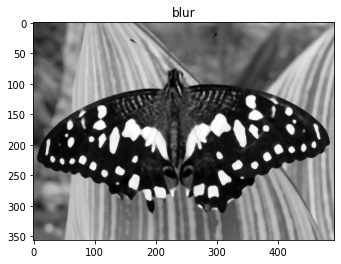

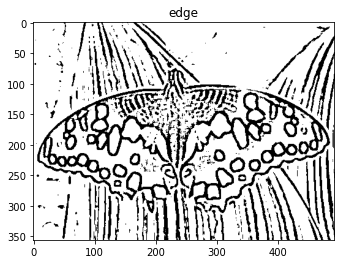

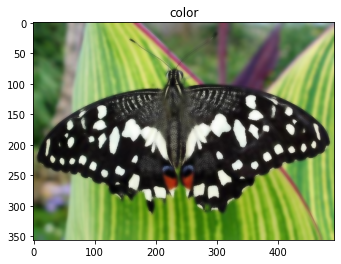

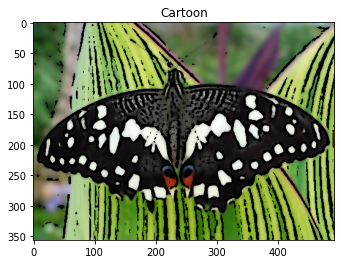

In [ ]:
img = cv2.imread("butterfly.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)

edge = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

color = cv2.bilateralFilter(img, 9, 300, 300)

cartoon = cv2.bitwise_and(color, color, mask=edge) 


imshow("src", img); plt.show()
imshow("blur", blur); plt.show()
imshow("edge", edge); plt.show()
imshow("color", color); plt.show()
imshow("Cartoon", cartoon); plt.show()


### 응용 2

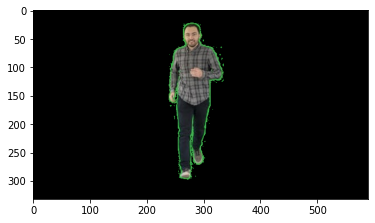

In [ ]:
img = cv2.imread('chromakey.jpg')

height, width, _ = img.shape

for h in range(0, height):
        for w in range(0, width):
            b = img[h, w, 0]
            g = img[h, w, 1]
            r = img[h, w, 2]    
            
            if ( b > 50 and b < 70) and ( g > 150 and g < 200) and ( r > 30 and r < 60)   :
                img[h, w, :] = 0                
imshow("", img)

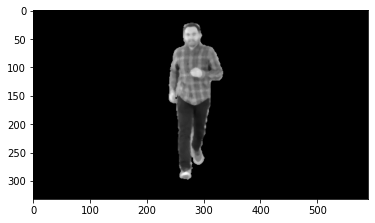

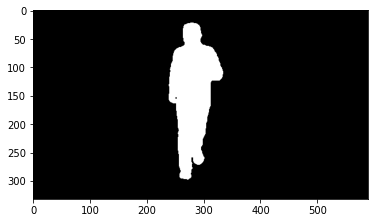

In [ ]:
blur = cv2.medianBlur(img, 5)
imshow("", blur)

gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

th = 10
_, mask = cv2.threshold(gray, th, 255, cv2.THRESH_BINARY)   #    gray > th 

imshow("", gray); plt.show()
imshow("", mask); plt.show()

In [ ]:
(gray > th)*255

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])